In [1]:
import pandas as pd
import numpy as np

In [15]:
col_names = ['ID', 'z', 'S', 'e_S', 'E_S', 'Tp1024', 'f_Tp124', 'Fp1024', 
             'e_Fp1024', 'E_Fp1024', 'Tp64', 'Fp64', 'e_Fp64', 'E_Fp64', 
             'Tp64r', 'Fp64r', 'e_Fp64r', 'E_Fp64r', 'Eiso', 'e_Eiso', 
             'Liso', 'e_Liso', 'Flim', 'zmax']

Burst_nrg_par_df = pd.read_csv('Burst_energetics.txt', sep='\s+', 
                            skiprows=47, names=col_names)


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_21522/1554252030.py:6: SyntaxWarning: invalid escape sequence '\s'
  Burst_nrg_par_df = pd.read_csv('Burst_energetics.txt', sep='\s+',


In [12]:
col_names = ['ID', 'SType', 'tstart', 'DeltaT', 'SMod', 'f_SMod', 'alpha', 
             'e_alpha', 'E_alpha', 'f_beta', 'beta', 'e_beta', 'E_beta', 
             'Ep', 'e_Ep', 'E_Ep', 'F', 'e_F', 'E_F', 'chi2', 'DoF', 'f_P', 
             'P', 'Com']

Spec_par_df = pd.read_csv('Spectral_parameters.txt', sep='\s+', 
                            skiprows=57, names=col_names, skip_blank_lines=False)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1630/3509725222.py:6: SyntaxWarning: invalid escape sequence '\s'
  Spec_par_df = pd.read_csv('Spectral_parameters.txt', sep='\s+',


In [53]:
col_names = ['ID', 'SType', 'tstart', 'DeltaT', 'SMod', 'f_SMod', 'alpha', 
             'e_alpha', 'E_alpha', 'f_beta', 'beta', 'e_beta', 'E_beta', 
             'Ep', 'e_Ep', 'E_Ep', 'F', 'e_F', 'E_F', 'chi2', 'DoF', 'f_P', 
             'P', 'Com']

Spec_par_df = pd.read_csv('Spectral_parameters.txt', sep='\s+', 
                            skiprows=57, names=col_names)



<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1630/489639572.py:6: SyntaxWarning: invalid escape sequence '\s'
  Spec_par_df = pd.read_csv('Spectral_parameters.txt', sep='\s+',


In [54]:
arr = Spec_par_df['f_beta'].values

for index, a in enumerate(arr):
    if a == 0: 
        l1 = []
        l2 = []
        l3 = []
        
    elif a == 1:
        l1 = ['Ep', 'e_Ep', 'E_Ep', 'F', 'e_F', 'E_F', 'chi2', 'DoF', 'f_P', 'P', 'Com']
        l2 = ['e_beta', 'E_beta', 'Ep', 'e_Ep', 'E_Ep', 'F', 'e_F', 'E_F', 'chi2', 'DoF', 'f_P']
        l3 = ['e_beta', 'E_beta']    
                
    elif Spec_par_df.at[index, 'SMod'] == 'PL':
        l1 = ['F', 'e_F', 'E_F', 'chi2', 'DoF', 'f_P', 'P', 'Com']
        l2 = ['f_beta', 'beta', 'e_beta', 'E_beta', 'Ep', 'e_Ep', 'E_Ep', 'F']
        l3 = ['f_beta', 'beta', 'e_beta', 'E_beta', 'Ep', 'e_Ep', 'E_Ep']
    
    else:
        l1 = ['Ep', 'e_Ep', 'E_Ep', 'F', 'e_F', 'E_F', 'chi2', 'DoF', 'f_P', 'P', 'Com']
        l2 = ['f_beta', 'beta', 'e_beta', 'E_beta', 'Ep', 'e_Ep', 'E_Ep', 'F', 'e_F', 'E_F', 'chi2']
        l3 = ['f_beta', 'beta', 'e_beta', 'E_beta']
        
    for f1, f2 in zip(list(reversed(l1)), list(reversed(l2))):
        Spec_par_df.at[index, f1] = Spec_par_df.at[index, f2]
    for f3 in l3:
        Spec_par_df.at[index, f3] = np.nan
        

In [56]:
Spec_par_df[Spec_par_df['SMod']=='PL'].style

,ID,SType,tstart,DeltaT,SMod,f_SMod,alpha,e_alpha,E_alpha,f_beta,beta,e_beta,E_beta,Ep,e_Ep,E_Ep,F,e_F,E_F,chi2,DoF,f_P,P,Com
210,GRB080413B,i,0.000000,8.448000,PL,yes,-2.000000,0.110000,0.100000,nan,nan,nan,nan,nan,nan,nan,0.760000,0.070000,0.070000,48.600000,61.000000,0.000000,0.880000,nan


In [58]:
df = Spec_par_df[Spec_par_df['SType'] == 'i'][Spec_par_df['SMod'] == 'CPL']

/tmp/ipykernel_1630/303878159.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = Spec_par_df[Spec_par_df['SType'] == 'i'][Spec_par_df['SMod'] == 'CPL']


<Axes: >

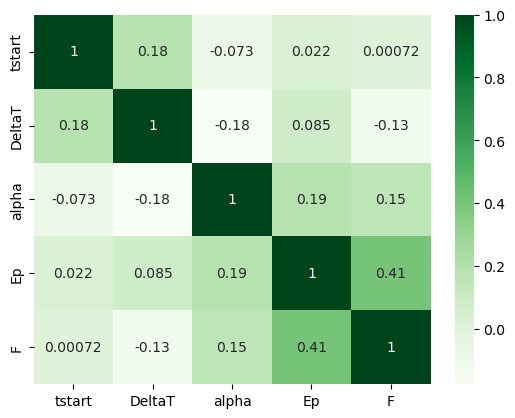

In [62]:
import seaborn as sns

filter = ['tstart', 'DeltaT', 'alpha', 'Ep', 'F']

matrix = df[filter].corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

<Axes: >

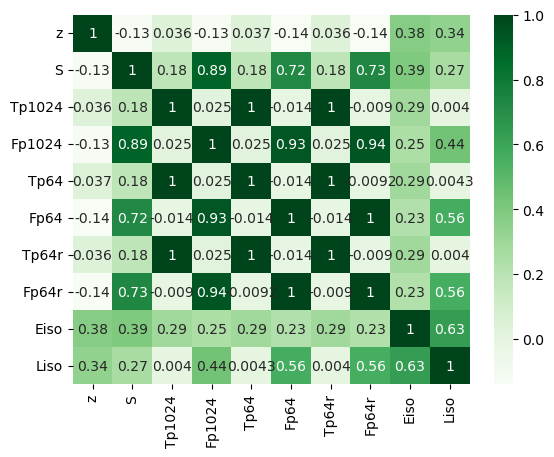

In [17]:
import seaborn as sns

col_names = ['ID', 'z', 'S', 'e_S', 'E_S', 'Tp1024', 'f_Tp124', 'Fp1024', 
             'e_Fp1024', 'E_Fp1024', 'Tp64', 'Fp64', 'e_Fp64', 'E_Fp64', 
             'Tp64r', 'Fp64r', 'e_Fp64r', 'E_Fp64r', 'Eiso', 'e_Eiso', 
             'Liso', 'e_Liso', 'Flim', 'zmax']

filter = ['z', 'S', 'Tp1024', 'Fp1024', 
          'Tp64', 'Fp64', 'Tp64r', 'Fp64r',
          'Eiso','Liso']

matrix = Burst_nrg_par_df[filter].corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

<Axes: >

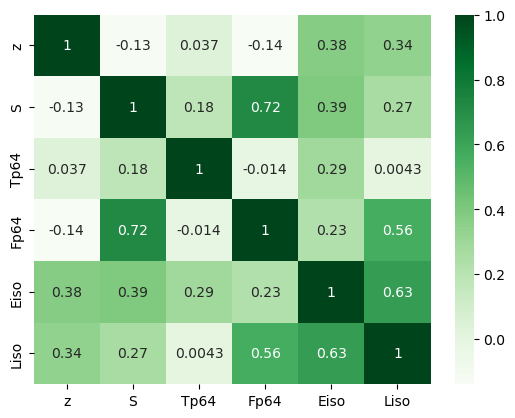

In [19]:
col_names = ['ID', 'z', 'S', 'e_S', 'E_S', 'Tp1024', 'f_Tp124', 'Fp1024', 
             'e_Fp1024', 'E_Fp1024', 'Tp64', 'Fp64', 'e_Fp64', 'E_Fp64', 
             'Tp64r', 'Fp64r', 'e_Fp64r', 'E_Fp64r', 'Eiso', 'e_Eiso', 
             'Liso', 'e_Liso', 'Flim', 'zmax']

filter = ['z', 'S', 'Tp64', 'Fp64',
          'Eiso','Liso']

matrix = Burst_nrg_par_df[filter].corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

In [21]:
# Dumb test 
from sklearn.model_selection import train_test_split

filter = ['S', 'Tp64', 'Fp64', 'Eiso','Liso']
X = Burst_nrg_par_df[filter].values
y = Burst_nrg_par_df['z'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestRegressor

rnd_forest = RandomForestRegressor(n_estimators=500, max_depth=10, n_jobs=-1)
rnd_forest.fit(X_train, y_train)
score = rnd_forest.score(X_test, y_test)
predictions = rnd_forest.predict(X_test)


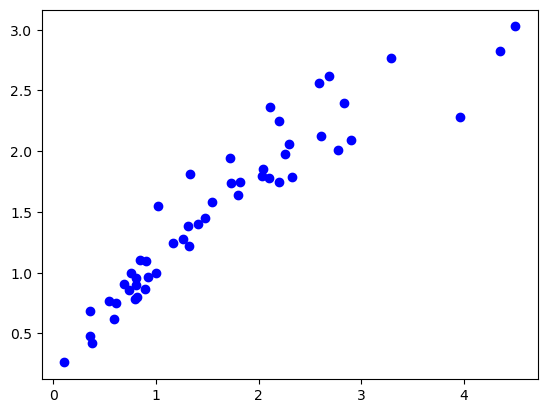

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, predictions, label='Dataset values', color='blue')
plt.show()

In [28]:
dict = {
    'y_test': y_test,
    'y_predict': predictions
    }

results = pd.DataFrame(dict)

results.style


,y_test,y_predict
0,2.260000,1.973471
1,0.360000,0.686553
2,0.360000,0.480560
3,0.740000,0.857611
4,2.100000,1.778448
5,2.770000,2.012170
6,1.820000,1.743808
7,0.760000,0.996062
8,2.590000,2.563948
9,1.800000,1.642668
